In [ ]:
# Titanic Dataset - Exploratory Data Analysis (EDA)

This project explores the **Titanic: Machine Learning from Disaster** dataset from Kaggle.  
Ie will:
- Clean and prepare the data  
- Explore missing values and handle them  
- Generate summary statistics and insights (e.g., survival by gender/class)  
- Visualize survival rates and feature relationships  

**Libraries used:** Pandas, Numpy, Seaborn, Matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 

In [5]:
df = pd.read_csv(r"C:\Users\ud\Desktop\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

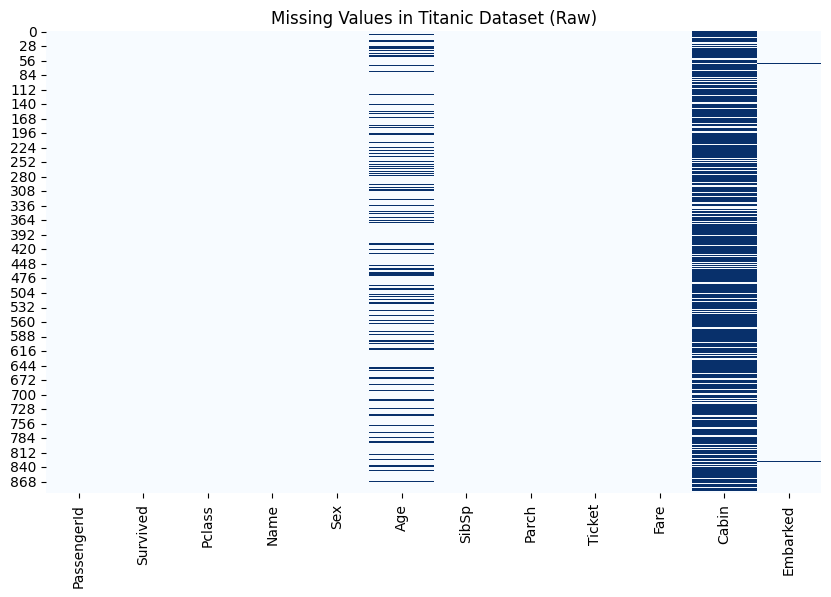

In [59]:
raw_df = pd.read_csv(r"C:\Users\ud\Desktop\train.csv")  

plt.figure(figsize=(10,6))
sns.heatmap(raw_df.isnull(), cbar=False, cmap="Blues")
plt.title("Missing Values in Titanic Dataset (Raw)")
plt.show()

In [62]:
df.drop(columns=["Cabin"], inplace=True, errors="ignore")

df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


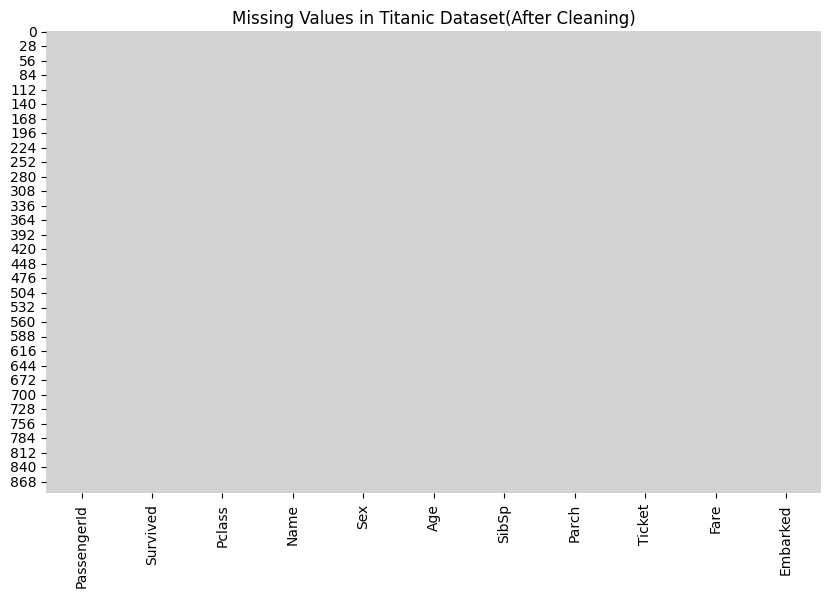

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(["lightgrey", "blue"]))
plt.title("Missing Values in Titanic Dataset(After Cleaning)")
plt.show()

In [13]:
df["Survived"].value_counts() #overall survival counts

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df.groupby("Sex")["Survived"].mean() # Survival by gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [15]:
df.groupby("Pclass")["Survived"].mean() # Survival by class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
df.groupby(["Pclass","Sex"])["Survived"].mean()# Survival by class and gender

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

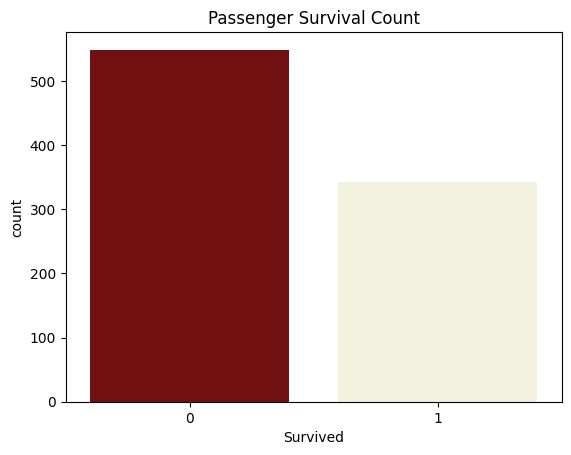

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived", data=df, hue="Survived", 
              palette=["maroon", "beige"], legend=False)

plt.title("Passenger Survival Count")
plt.show()

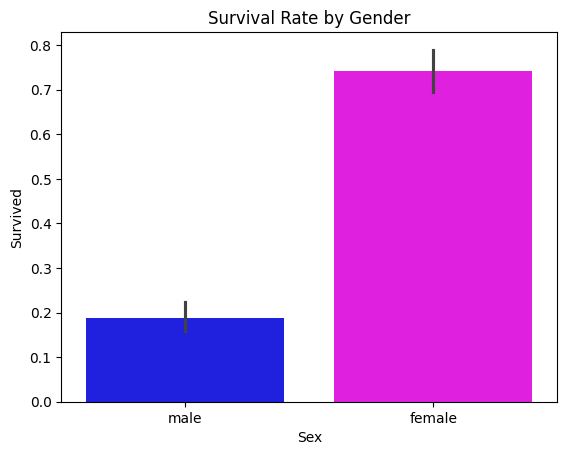

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=df, hue="Sex", 
            palette=["blue", "fuchsia"], legend=False)

plt.title("Survival Rate by Gender")
plt.show()

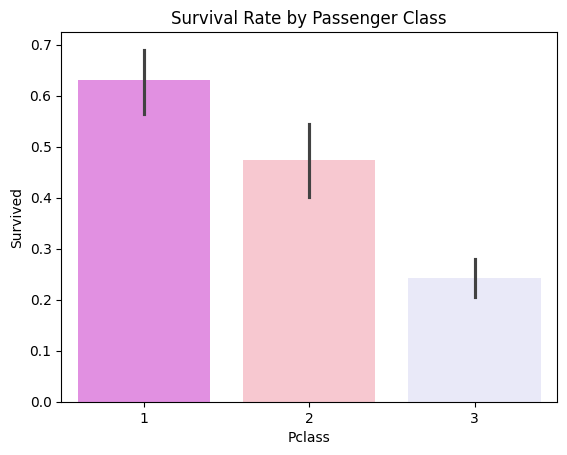

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Pclass", y="Survived", data=df, 
            hue="Pclass", palette=["violet", "pink", "lavender"], legend=False)

plt.title("Survival Rate by Passenger Class")
plt.show()

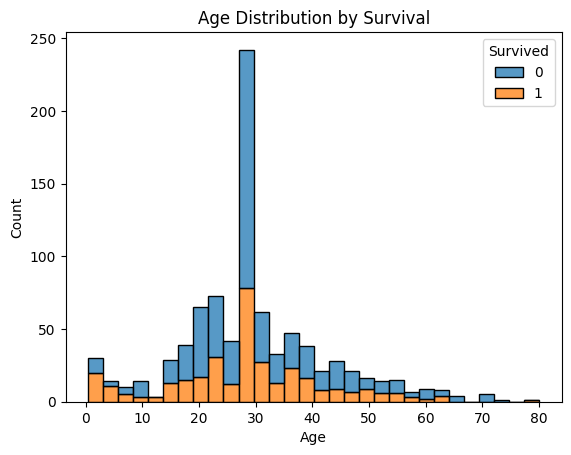

In [36]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=False)
plt.title("Age Distribution by Survival")
plt.show()

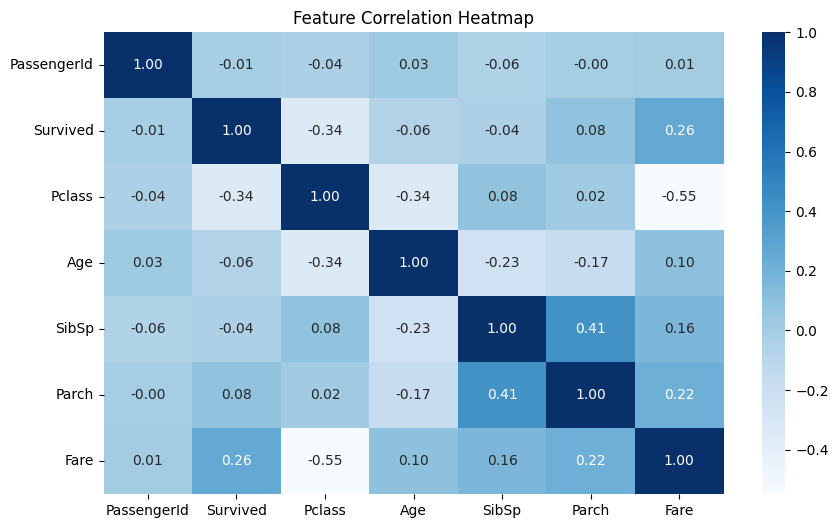

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()